<a href="https://colab.research.google.com/github/Dinesh8688/wine-quality-prediction/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dictonaries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

In [104]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (2).csv


In [105]:
import pandas as pd
a = pd.read_csv("/content/winequality-red.csv")

In [106]:
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [107]:
a.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [108]:
a.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [109]:
a.ndim

2

In [110]:
a.shape

(1599, 12)

In [111]:
a.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [131]:
len(a.columns)

12

In [136]:
a.rename(columns={"residual sugar":"residual sugar content","pH":"pH values","alcohol":"alcohol content"} ,inplace=True)

In [137]:
a.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar content,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH values,sulphates,alcohol content,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           1599 non-null   float64
 1   volatile acidity        1599 non-null   float64
 2   citric acid             1599 non-null   float64
 3   residual sugar content  1599 non-null   float64
 4   chlorides               1599 non-null   float64
 5   free sulfur dioxide     1599 non-null   float64
 6   total sulfur dioxide    1599 non-null   float64
 7   density                 1599 non-null   float64
 8   pH values               1599 non-null   float64
 9   sulphates               1599 non-null   float64
 10  alcohol content         1599 non-null   float64
 11  quality                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [139]:
a.duplicated().sum()

240

In [141]:
a.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [142]:
a.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [143]:
a.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar content    0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH values                 0
sulphates                 0
alcohol content           0
quality                   0
dtype: int64

In [144]:
a.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar content', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH values', 'sulphates',
       'alcohol content', 'quality'],
      dtype='object')

In [146]:
df = a[['fixed acidity','residual sugar content','pH values','alcohol content','quality']]
df

,fixed acidity,residual sugar content,pH values,alcohol content,quality
0,7.4,1.9,3.51,9.4,5
1,7.8,2.6,3.20,9.8,5
2,7.8,2.3,3.26,9.8,5
3,11.2,1.9,3.16,9.8,6
4,7.4,1.9,3.51,9.4,5
...,...,...,...,...,...
1594,6.2,2.0,3.45,10.5,5
1595,5.9,2.2,3.52,11.2,6
1596,6.3,2.3,3.42,11.0,6
1597,5.9,2.0,3.57,10.2,5


### Visulaization

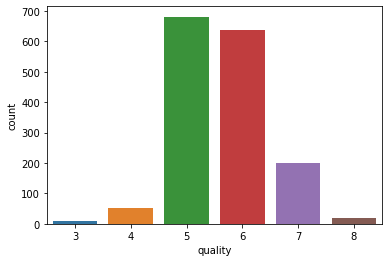

In [147]:
sns.countplot(x='quality',data=a)

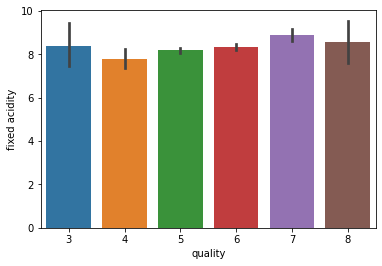

In [148]:
sns.barplot(x='quality',y='fixed acidity',data=a)

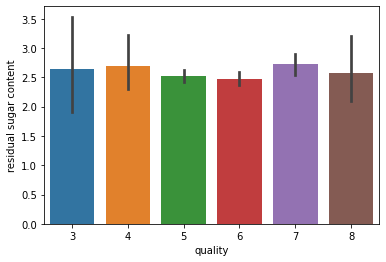

In [149]:
sns.barplot(x='quality',y='residual sugar content',data=a)

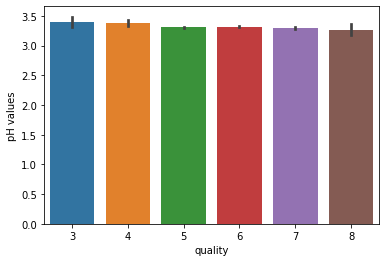

In [150]:
sns.barplot(x='quality',y='pH values',data=a)

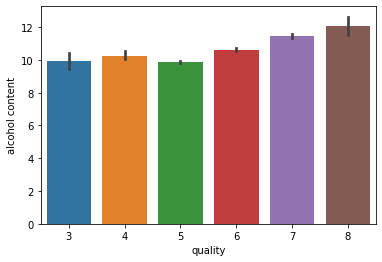

In [151]:
sns.barplot(x='quality',y='alcohol content',data=a)

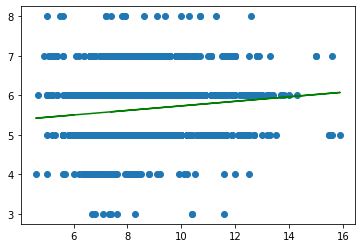

[5.80175468]


In [168]:
#predicting the fixed acidity in quality

pyplot.scatter(a[["fixed acidity"]],a["quality"])

model = LinearRegression()
model.fit(df[["fixed acidity"]],df["quality"])
predicted = model.predict(df[["fixed acidity"]])
pyplot.plot(df["fixed acidity"],predicted,"green")
pyplot.show()
print(model.predict([[11.2]]))

In [177]:
#predicting the fixed acidity in quality
print(model.predict([[11.2]]))

[5.91640266]


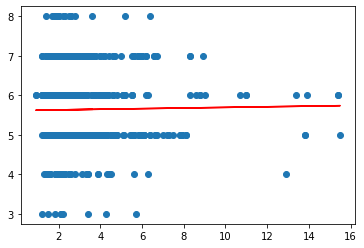

[5.63257126]


In [182]:
#predicting the residual sugar content in quality
pyplot.scatter(a[["residual sugar content"]],a["quality"])

model = LinearRegression()
model.fit(df[["residual sugar content"]],df["quality"])
predicted = model.predict(df[["residual sugar content"]])
pyplot.plot(df["residual sugar content"],predicted,"red")
pyplot.show()
print(model.predict([[2.1]]))

In [183]:
#predicting the residual sugar content in quality
print(model.predict([[2.1]]))

[5.63257126]


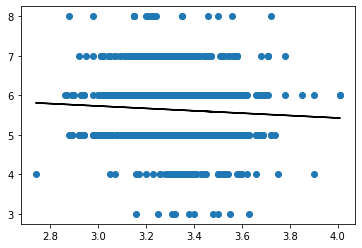

[4.52204095]


In [180]:
#predicting the pH values in quality
pyplot.scatter(a[["pH values"]],a["quality"])

model = LinearRegression()
model.fit(df[["pH values"]],df["quality"])
predicted = model.predict(df[["pH values"]])
pyplot.plot(df["pH values"],predicted,"black")
pyplot.show()
print(model.predict([[7]]))

In [181]:
#predicting the pH values in quality
print(model.predict([[7]]))

[4.52204095]


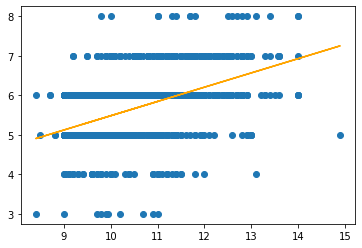

[5.51947672]


In [184]:
#predicting the alcohol content in quality
pyplot.scatter(a[["alcohol content"]],a["quality"])

model = LinearRegression()
model.fit(df[["alcohol content"]],df["quality"])
predicted = model.predict(df[["alcohol content"]])
pyplot.plot(df["alcohol content"],predicted,"orange")
pyplot.show()
print(model.predict([[10.1]]))

In [185]:
#predicting the alcohol content in quality
print(model.predict([[10.1]]))

[5.51947672]


In [162]:
df

,fixed acidity,residual sugar content,pH values,alcohol content,quality
0,7.4,1.9,3.51,9.4,5
1,7.8,2.6,3.20,9.8,5
2,7.8,2.3,3.26,9.8,5
3,11.2,1.9,3.16,9.8,6
4,7.4,1.9,3.51,9.4,5
...,...,...,...,...,...
1594,6.2,2.0,3.45,10.5,5
1595,5.9,2.2,3.52,11.2,6
1596,6.3,2.3,3.42,11.0,6
1597,5.9,2.0,3.57,10.2,5
